## Preparación de las variables

Cargamos librerías que utilizaremos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel

pd.set_option('display.max_columns', None)

Cargamos los datos que exportamos en el anterior notebook

In [2]:
ndf = pd.read_csv('../data/ndf.csv')

#### CREAMOS VARIABLES DUMMIES

In [3]:
dummies = pd.get_dummies(ndf.loc[:,['term',
                                    'home_ownership',
                                    'verification_status',
                                    'application_type',
                                    'disbursement_method']])
dummies.head()

,term_ 36 months,term_ 60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
0,1,0,0,0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,0,1,0,1,0,1,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,1,0,1,0
4,1,0,0,1,0,0,0,0,1,1,0,1,0


Posteriormente borraresmos las variables que hemos utilizado como dummies

In [4]:
ndf= ndf.drop(['term',
               'home_ownership',
               'verification_status',
               'application_type',
               'disbursement_method',], axis= 1)

#### ESCALAMOS

Escalamos las variables numéricas del conjunto de datos, para ello utilizaremos el siguiente método:

In [5]:
scale_column =['loan_amnt',
               'annual_inc',
               'dti',
               'inq_last_6mths',
               'tot_cur_bal',
               'total_rev_hi_lim',
               'bc_util',
               'mort_acc',
               'pct_tl_nvr_dlq',
               'pub_rec_bankruptcies',
               'tax_liens',
               'total_il_high_credit_limit']

Utilizamos la función MinMaxScaler para escalar de forma sencilla

In [6]:
scaler = MinMaxScaler()
ndf[scale_column] = scaler.fit_transform(ndf[scale_column])

In [7]:
ndf = pd.concat([dummies, ndf], axis = 1)
ndf.head()

,term_ 36 months,term_ 60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay,Unnamed: 0,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,last_fico_range_high,last_fico_range_low,tot_cur_bal,total_rev_hi_lim,bc_util,mort_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_il_high_credit_limit,resultado
0,1,0,0,0,1,0,1,0,0,1,0,1,0,8,0.271154,0.016105,0.017007,720.0,724.0,0.000000,724.0,720.0,0.109957,0.00376,0.053292,0.042553,0.951955,0.083333,0.0,0.057363,1
1,1,0,0,0,0,1,0,1,0,1,0,1,0,10,0.158974,0.005263,0.006076,685.0,689.0,0.000000,669.0,665.0,0.001388,0.00036,0.387539,0.000000,0.776536,0.000000,0.0,0.001903,1
2,1,0,0,1,0,0,1,0,0,1,0,1,0,24,0.166667,0.011579,0.013133,710.0,714.0,0.333333,719.0,715.0,0.068662,0.00857,0.109326,0.085106,1.000000,0.000000,0.0,0.015338,1
3,0,1,0,0,0,1,0,1,0,1,0,1,0,42,0.230769,0.005471,0.010120,690.0,694.0,0.000000,659.0,655.0,0.002721,0.00287,0.086991,0.000000,1.000000,0.166667,0.0,0.002617,1
4,1,0,0,1,0,0,0,0,1,1,0,1,0,91,0.333333,0.007895,0.010871,685.0,689.0,0.000000,684.0,680.0,0.031702,0.00030,0.352665,0.021277,0.888268,0.000000,0.0,0.014425,1


### Creación de muestra train y test

Utilizaremos el random forest para seleccionar variables y porteriormente dividir en train y test

In [8]:
Y = ndf.resultado

In [9]:
X = ndf.drop('resultado', axis = 1).astype('float64')

In [10]:
random_forest = RandomForestClassifier(n_estimators = 100, n_jobs=5, random_state=0)
sel = SelectFromModel(random_forest, threshold=0.02)
sel.fit(X, Y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=5, random_state=0),
                threshold=0.02)

Text(0.5, 1.0, 'Feature importance Random forest')

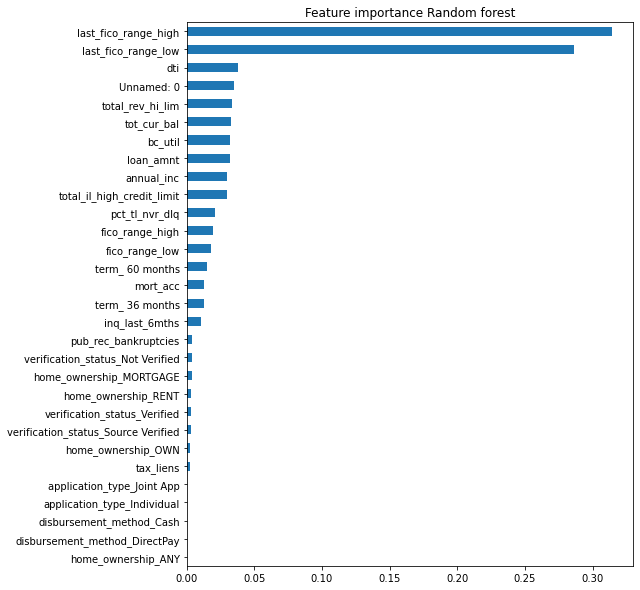

In [11]:
coef2 = pd.Series(sel.estimator_.feature_importances_, index = X.columns)

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
coef2.sort_values().plot(kind = "barh")
plt.title("Feature importance Random forest")

In [12]:
X.columns[sel.get_support()]

Index(['Unnamed: 0', 'loan_amnt', 'annual_inc', 'dti', 'last_fico_range_high',
       'last_fico_range_low', 'tot_cur_bal', 'total_rev_hi_lim', 'bc_util',
       'pct_tl_nvr_dlq', 'total_il_high_credit_limit'],
      dtype='object')

In [13]:
X_forest = X[['Unnamed: 0', 'loan_amnt', 'annual_inc', 'dti', 'last_fico_range_high',
       'last_fico_range_low', 'tot_cur_bal', 'total_rev_hi_lim', 'bc_util',
       'pct_tl_nvr_dlq', 'total_il_high_credit_limit']]

#### DIVIDIMOS ENTRE TRAIN Y TEST

Hemos seleccionado un 70% de los datos para el train y un 30% para el test

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_forest, Y, test_size=0.3, random_state=0)

In [15]:
print(X_train.shape); print(X_test.shape)

(319684, 11)
(137008, 11)


Lo siguiente que haremos será ver como está de balanceada la variable objetivo y si tanto en el train como en el test la proporción es parecida.

In [16]:
ytrain_obj = pd.DataFrame(Y_train, columns = ['resultado'])
ytest_obj = pd.DataFrame(Y_test, columns = ['resultado'])

In [17]:
ytrain_obj['resultado'].value_counts(normalize=True)

1    0.756926
0    0.243074
Name: resultado, dtype: float64

In [18]:
ytest_obj['resultado'].value_counts(normalize=True)

1    0.755744
0    0.244256
Name: resultado, dtype: float64

Observamos que la variable no está muy desbalanceada y la proporción es un 75/25

In [19]:
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
np.savetxt("../data/Y_train.csv", Y_train, delimiter=",")
np.savetxt("../data/Y_test.csv", Y_test, delimiter=",")